#  Word2vec

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://radimrehurek.com/gensim/models/word2vec.html
* https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
* https://pytorch.org/text/stable/vocab.html
* https://github.com/OlgaChernytska/word2vec-pytorch
* https://www.baeldung.com/cs/nlps-word2vec-negative-sampling
* https://towardsdatascience.com/implementing-word2vec-in-pytorch-from-the-ground-up-c7fe5bf99889

## Задачи для совместного разбора

1\. Рассмотрите основные шаги подготовки данных для обучения skip-gram модели

In [ ]:
text = "Рассмотрите основные шаги подготовки данных для обучения skip-gram модели"
tokens = text.lower().split()
tokens

['рассмотрите',
 'основные',
 'шаги',
 'подготовки',
 'данных',
 'для',
 'обучения',
 'skip-gram',
 'модели']

In [ ]:
x = []
y = []

for idx, token in enumerate(tokens):
  if idx == 0 or idx == len(tokens)-1:
    continue
  x.append(token)
  y.append(tokens[idx-1])

  x.append(token)
  y.append(tokens[idx+1])

In [ ]:
import pandas as pd

dataset = pd.DataFrame({"x": x, "y": y})
dataset["x"] = dataset["x"].map(tokens.index)
dataset["y"] = dataset["y"].map(tokens.index)
dataset

,x,y
0,1,0
1,1,2
2,2,1
3,2,3
4,3,2
5,3,4
6,4,3
7,4,5
8,5,4
9,5,6


2\. Рассмотрите основные шаги по настройке skip-gram модели

In [ ]:
import torch.nn as nn
import torch as th

In [ ]:
embeddings = nn.Embedding(num_embeddings=len(tokens), embedding_dim=16)
x_t = th.tensor(dataset["x"])
y_t = th.tensor(dataset["y"])

e = embeddings(x_t)

In [ ]:
fc = nn.Linear(
    in_features=embeddings.embedding_dim,
    out_features=len(tokens)
)

In [ ]:
predictions = fc(e)
predictions[1]

tensor([-0.5356,  0.0176, -0.4606, -0.2058, -0.2831,  0.1157,  0.1297,  0.3075,
        -0.5320], grad_fn=<SelectBackward0>)

In [ ]:
criterion = nn.CrossEntropyLoss()

loss = criterion(predictions, y_t)
loss

tensor(2.3355, grad_fn=<NllLossBackward0>)

## Задачи для самостоятельного решения

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p class="task" id="1"></p>

1\. Загрузите тексты новостей из файла `news_500.csv`. Удалите из текстов все знаки препинания и символы не из русского алфавита, приведите все слова к нижнему регистру и удалите стоп-слова.

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/6/news_500.csv')
df.head(3)

,Unnamed: 0,id,fronturl,publish_date_t,publish_date,title,photo,project,category,opinion_authors,authors,anons,overview,text
0,0,5703b1e99a7947783a5a159a,http://www.rbc.ru/economics/28/09/2000/5703b1e...,970130997,"Thu, 28 Sep 2000 12:49:57 +0400",В.Путин торопит разработчиков военной реформы,{'url': 'http://pics.v7.top.rbk.ru/v6_top_pics...,NaN,Экономика,NaN,NaN,... заявление он сделал перед совещанием чле...,"Президент России Владимир Путин считает, что к...","Президент России Владимир Путин считает, что к..."
1,1,5703b1ea9a7947783a5a15b3,http://www.rbc.ru/economics/04/10/2000/5703b1e...,970648343,"Wed, 04 Oct 2000 12:32:23 +0400",Арафат и Барак будут договариваться,{'url': 'http://pics.v7.top.rbk.ru/v6_top_pics...,NaN,Экономика,NaN,NaN,... всеобъемлющего урегулирования по всем гл...,Глава Палестинской автономии Ясир Арафат напра...,Перед отъездом Я.Арафат провел совещание с пре...
2,2,5703b1e99a7947783a5a15a0,http://www.rbc.ru/economics/03/10/2000/5703b1e...,970581338,"Tue, 03 Oct 2000 17:55:38 +0400",Седьмая годовщина пролетарской революции,{'url': 'http://pics.v7.top.rbk.ru/v6_top_pics...,NaN,Экономика,NaN,NaN,... и манифестаций. Совместными колоннами пр...,Сегодня Москва отмечает 7-ую годовщину трагиче...,В связи с этим власти дали разрешение на прове...


In [ ]:
df['photo'][1]

"{'url': 'http://pics.v7.top.rbk.ru/v6_top_pics/resized/250xH/media/img/1/20/754598599461201.jpeg'}"

In [ ]:
"{'url': 'http://pics.v7.top.rbk.ru/v6_top_pics/resized/250xH/media/img/1/20/754598599461201.jpeg'}".split("'")[3]

'http://pics.v7.top.rbk.ru/v6_top_pics/resized/250xH/media/img/1/20/754598599461201.jpeg'

In [ ]:
df['photo'] = df['photo'].map(lambda x: x.split("'")[3])

In [ ]:
df.head(3)

,Unnamed: 0,id,fronturl,publish_date_t,publish_date,title,photo,project,category,opinion_authors,authors,anons,overview,text
0,0,5703b1e99a7947783a5a159a,http://www.rbc.ru/economics/28/09/2000/5703b1e...,970130997,"Thu, 28 Sep 2000 12:49:57 +0400",В.Путин торопит разработчиков военной реформы,http://pics.v7.top.rbk.ru/v6_top_pics/resized/...,NaN,Экономика,NaN,NaN,... заявление он сделал перед совещанием чле...,"Президент России Владимир Путин считает, что к...","Президент России Владимир Путин считает, что к..."
1,1,5703b1ea9a7947783a5a15b3,http://www.rbc.ru/economics/04/10/2000/5703b1e...,970648343,"Wed, 04 Oct 2000 12:32:23 +0400",Арафат и Барак будут договариваться,http://pics.v7.top.rbk.ru/v6_top_pics/resized/...,NaN,Экономика,NaN,NaN,... всеобъемлющего урегулирования по всем гл...,Глава Палестинской автономии Ясир Арафат напра...,Перед отъездом Я.Арафат провел совещание с пре...
2,2,5703b1e99a7947783a5a15a0,http://www.rbc.ru/economics/03/10/2000/5703b1e...,970581338,"Tue, 03 Oct 2000 17:55:38 +0400",Седьмая годовщина пролетарской революции,http://pics.v7.top.rbk.ru/v6_top_pics/resized/...,NaN,Экономика,NaN,NaN,... и манифестаций. Совместными колоннами пр...,Сегодня Москва отмечает 7-ую годовщину трагиче...,В связи с этим власти дали разрешение на прове...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       500 non-null    int64  
 1   id               500 non-null    object 
 2   fronturl         500 non-null    object 
 3   publish_date_t   500 non-null    int64  
 4   publish_date     500 non-null    object 
 5   title            500 non-null    object 
 6   photo            500 non-null    object 
 7   project          0 non-null      float64
 8   category         500 non-null    object 
 9   opinion_authors  0 non-null      float64
 10  authors          0 non-null      float64
 11  anons            500 non-null    object 
 12  overview         486 non-null    object 
 13  text             500 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 54.8+ KB


### Тексты

title, anons, overview, text - тексты

In [ ]:
names = 'title, anons, overview, text'.split(', ')
names

['title', 'anons', 'overview', 'text']

In [ ]:
import re

In [ ]:
for i, x in enumerate(df['overview']):
    if type(x) != str:
        print(i, x)

95 nan
207 nan
216 nan
278 nan
288 nan
289 nan
290 nan
291 nan
320 nan
321 nan
381 nan
382 nan
417 nan
418 nan


In [ ]:
df['overview'].fillna('', inplace=True)

<ipython-input-23-593299ae0532>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('', inplace=True)


In [ ]:
for i, x in enumerate(df['overview']):
    if type(x) != str:
        print(i, x)

In [ ]:
for name in names:
    print(name)
    df[name] = df[name].map(lambda x: re.findall(r'[a-яё]+', x.lower()))


title
anons
overview
text


In [ ]:
df.head(3)[names]

,title,anons,overview,text
0,"[в, путин, торопит, разработчиков, военной, ре...","[заявление, он, сделал, перед, совещанием, чле...","[президент, россии, владимир, путин, считает, ...","[президент, россии, владимир, путин, считает, ..."
1,"[арафат, и, барак, будут, договариваться]","[всеобъемлющего, урегулирования, по, всем, гла...","[глава, палестинской, автономии, ясир, арафат,...","[перед, отъездом, я, арафат, провел, совещание..."
2,"[седьмая, годовщина, пролетарской, революции]","[и, манифестаций, совместными, колоннами, прой...","[сегодня, москва, отмечает, ую, годовщину, тра...","[в, связи, с, этим, власти, дали, разрешение, ..."


In [ ]:
import nltk
nltk.download('stopwords')
russian_stopwords = set(nltk.corpus.stopwords.words('russian'))
russian_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [ ]:
pip install pymorphy3

In [ ]:
import pymorphy3

In [ ]:
morph = pymorphy3.MorphAnalyzer()

In [ ]:
morph.parse('себе')[0].normal_form

'себя'

In [ ]:
df[names] = df[names].map(lambda x: [i for i in x if i not in russian_stopwords])

In [ ]:
df.head(3)[names]

,title,anons,overview,text
0,"[путин, торопит, разработчиков, военной, реформы]","[заявление, сделал, совещанием, членов, совета...","[президент, россии, владимир, путин, считает, ...","[президент, россии, владимир, путин, считает, ..."
1,"[арафат, барак, будут, договариваться]","[всеобъемлющего, урегулирования, всем, главным...","[глава, палестинской, автономии, ясир, арафат,...","[отъездом, арафат, провел, совещание, представ..."
2,"[седьмая, годовщина, пролетарской, революции]","[манифестаций, совместными, колоннами, пройдут...","[сегодня, москва, отмечает, ую, годовщину, тра...","[связи, этим, власти, дали, разрешение, провед..."


In [ ]:
df.shape

(500, 14)

<p class="task" id="2"></p>

2\. Настройте модель Word2Vec из пакета `gensim`. Для валидации выведите на экран информацию о ближайших словах для нескольких случайно выбранных токенов из обучающей выборки.

- [ ] Проверено на семинаре

> Подразумеваю, что тексты новостей это только столбец text, поэтому дальнешие действия буду выполнять с этим столбцом

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(df['text'])

In [ ]:
df['text'].to_list()

[['президент',
  'россии',
  'владимир',
  'путин',
  'считает',
  'концепция',
  'реформирования',
  'армии',
  'должна',
  'готова',
  'ноябрю',
  'такое',
  'заявление',
  'сделал',
  'совещанием',
  'членов',
  'совета',
  'безопасности',
  'рф',
  'сообщили',
  'рбк',
  'администрации',
  'президента',
  'путин',
  'также',
  'отметил',
  'эта',
  'реформа',
  'должна',
  'проводиться',
  'учетом',
  'проблем',
  'существующих',
  'настоящее',
  'время',
  'вооруженных',
  'силах',
  'рф',
  'одну',
  'таких',
  'проблем',
  'путин',
  'охарактеризовал',
  'параллелизм',
  'армейских',
  'структур',
  'основная',
  'цель',
  'реформирования',
  'армии',
  'сделать',
  'эффективной',
  'особенное',
  'внимание',
  'следует',
  'уделить',
  'социальным',
  'вопросам',
  'обеспечения',
  'военнослужащих',
  'президент',
  'россии',
  'заявил',
  'реформирование',
  'проводиться',
  'учетом',
  'основных',
  'положений',
  'предложенных',
  'советом',
  'безопасности',
  'россии',
  '

In [ ]:
import random

random_words = random.sample(list(model.wv.key_to_index.keys()), 5)

In [ ]:
# random_words = [i[random.randint(0, 10)] for i in random_words]
random_words

['наздратенко', 'нарушениях', 'продаже', 'государство', 'подписания']

In [ ]:
for word in random_words:
    print(word, model.wv.most_similar(word, topn=5))  # Замени "новость" на любое слово


наздратенко [('считает', 0.9978992938995361), ('лет', 0.9978771209716797), ('назвал', 0.9978722929954529), ('правительство', 0.9978582262992859), ('время', 0.9978400468826294)]
нарушениях [('этому', 0.9927310347557068), ('сообщил', 0.9927240610122681), ('зюганов', 0.9927160739898682), ('меры', 0.9927079677581787), ('несколько', 0.9926427006721497)]
продаже [('интервью', 0.9977371692657471), ('это', 0.9976683855056763), ('пока', 0.9976683259010315), ('мнение', 0.9976614713668823), ('течение', 0.9976168870925903)]
государство [('одного', 0.9940471053123474), ('собрания', 0.9940298795700073), ('назад', 0.9939362406730652), ('лидер', 0.9939337372779846), ('организации', 0.9939260482788086)]
подписания [('рынка', 0.9899610877037048), ('александра', 0.9899360537528992), ('рубежом', 0.9899287223815918), ('час', 0.9898409247398376), ('вашингтоне', 0.9897522926330566)]


<p class="task" id="3"></p>

3. Опишите класс `W2VDataset`, который реализует в себе логику получения контекстного окна для обучения skip-gram модели. При создании словаря игнорируйте токены, которые встретились меньше 20 раз. Продемонстрируйте пример работы.

![image.png](https://github.com/OlgaChernytska/word2vec-pytorch/raw/main/docs/skipgram_overview.png)

- [ ] Проверено на семинаре

### Заметки

In [ ]:
len(df['text'].to_list())

500

In [ ]:
words = []
for sent in df['text'].to_list():
    words.extend(sent)
len(words)

73121

In [ ]:
from collections import Counter

In [ ]:
x = list(Counter(words).items())
x.sort(key = lambda x: -x[1])
x = [i for i in x if i[1]>20]

In [ ]:
len(x)

537

In [ ]:
words = [i[0] for i in x]

In [ ]:
sents = []

for sent in df['text'].to_list():
    sents.append([i for i in sent if i in words])

In [ ]:
len(sents)

500

In [ ]:
sent

['рбк',
 'сообщили',
 'думском',
 'комитете',
 'кредитным',
 'организациям',
 'финансовым',
 'рынкам',
 'законопроект',
 'внесен',
 'депутатами',
 'госдумы',
 'адрианом',
 'пузановским',
 'владимиром',
 'никитиным',
 'юрием',
 'теном',
 'другими',
 'законопроектом',
 'устанавливаются',
 'основные',
 'понятия',
 'место',
 'офшорных',
 'банков',
 'банковской',
 'системе',
 'россии',
 'правоотношения',
 'офшорными',
 'кредитными',
 'организациями',
 'государственными',
 'органами',
 'исполнительной',
 'власти',
 'документом',
 'регулируется',
 'порядок',
 'получения',
 'разрешения',
 'ведение',
 'банковских',
 'операций',
 'офшорным',
 'банком',
 'требования',
 'процедуры',
 'регистрации',
 'законопроектом',
 'также',
 'описываются',
 'требования',
 'соблюдению',
 'банковской',
 'тайны',
 'операций',
 'ответственность',
 'случае',
 'несоблюдения',
 'определяется',
 'порядок',
 'проведения',
 'аудита',
 'офшорного',
 'банка',
 'порядок',
 'прекращения',
 'деятельности',
 'профильный',
 'ко

In [ ]:
for word_i in range(2, len(sent)-2):
    print(sent[word_i])

думском
комитете
кредитным
организациям
финансовым
рынкам
законопроект
внесен
депутатами
госдумы
адрианом
пузановским
владимиром
никитиным
юрием
теном
другими
законопроектом
устанавливаются
основные
понятия
место
офшорных
банков
банковской
системе
россии
правоотношения
офшорными
кредитными
организациями
государственными
органами
исполнительной
власти
документом
регулируется
порядок
получения
разрешения
ведение
банковских
операций
офшорным
банком
требования
процедуры
регистрации
законопроектом
также
описываются
требования
соблюдению
банковской
тайны
операций
ответственность
случае
несоблюдения
определяется
порядок
проведения
аудита
офшорного
банка
порядок
прекращения
деятельности
профильный
комитет
госдумы
правительство
рф
данный


In [ ]:
x, y = [], []

for sent in sents:
    for word_i in range(2, len(sent)-2):
        for i in range(-2, 3):
            if i != 0:
                x.append(sent[word_i])
                y.append(sent[word_i+i])

In [ ]:
len(x), len(y)

(96656, 96656)

In [ ]:
pd.DataFrame({
    'x':x,
    'y':y
})

,x,y
0,владимир,президент
1,владимир,россии
2,владимир,путин
3,владимир,считает
4,путин,россии
...,...,...
96651,госдумы,рф
96652,правительство,комитет
96653,правительство,госдумы
96654,правительство,рф


In [ ]:
len(words), len(set(words)) # words содержит уникальные токены

(537, 537)

### Класс датасета

In [ ]:
from collections import Counter
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader


class W2VDataset(Dataset):
    def __init__(self, corpus, window_size=2):
        words = []
        for sent in corpus:
            words.extend(sent)

        x = list(Counter(words).items())
        x.sort(key = lambda x: -x[1])
        x = [i for i in x if i[1]>20]

        words = [i[0] for i in x]

        sents = []

        for sent in corpus:
            sents.append([i for i in sent if i in words])
        self.sents = sents
        x, y = [], []



        for sent in sents:
            for word_i in range(window_size, len(sent)-window_size):
                for i in range(-window_size, window_size+1):
                    if i != 0:
                        x.append(sent[word_i])
                        y.append(sent[word_i+i])

        self.tokens = sorted(words) # уникальные токены
        self.index = {idx: word for idx, word in enumerate(self.tokens)}
        self.inverse_index = {word: idx for idx, word in enumerate(self.tokens)}
        self.tokens = [self.inverse_index[i] for i in self.tokens]
        x = [self.inverse_index[i] for i in x]
        y = [self.inverse_index[i] for i in y]
        self.data = list(zip(x, y))


    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

In [ ]:
data = W2VDataset(df['text'].to_list())

In [ ]:
data[1], len(data.data), len(data)

((tensor(40), tensor(381)), 96656, 96656)

<p class="task" id="4"></p>

4\. Реализуйте и настройте skip-gram модель. Перед началом обучения выберите случайным образом несколько слов из датасета и для каждого из них выведите на экран 3 ближайших слова в смысле косинусной близости между эмбеддингами. В процессе настройки для валидации периодически выводите на экран информацию о ближайших словах для этих слов. Выведите на экран график значения функции потерь в зависимости от номера эпохи.  

![image.png](https://github.com/OlgaChernytska/word2vec-pytorch/raw/main/docs/skipgram_detailed.png)

- [ ] Проверено на семинаре

### **model**

In [ ]:
class SkipGram(nn.Module):
    def __init__(self, size, embedding_dim):
        super(SkipGram, self).__init__()

        self.embeddings = nn.Embedding(size, embedding_dim)
        self.out = nn.Linear(embedding_dim, size)

    def forward(self, word):
        embedding = self.embeddings(word)
        out = self.out(embedding)

        return out


In [ ]:
model = SkipGram(len(data.tokens), embedding_dim=50)

In [ ]:
model.embeddings.weight.data

tensor([[-0.8289,  0.2236,  1.6714,  ...,  0.2780,  0.4145, -1.3457],
        [-0.5616, -0.2360,  0.9678,  ...,  1.6956, -0.4902, -0.4703],
        [ 0.2018, -2.0010,  0.1790,  ...,  0.2832,  1.8924,  0.3977],
        ...,
        [ 1.5519,  0.6655,  0.0770,  ..., -1.8934, -0.4889, -0.2793],
        [-0.8467,  0.0532,  1.0118,  ..., -0.5564,  0.5280,  0.0535],
        [ 1.2125,  1.1271,  1.0201,  ..., -1.9426,  1.0281,  1.5408]])

In [ ]:
Matr = model.embeddings.weight.data
Matr.shape

torch.Size([537, 50])

In [ ]:
import torch.nn.functional as F
import random
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
picked = random.sample(data.tokens, 3)
# picked = [data.inverse_index[i] for i in picked] # ушло в небытие:tokens - int
picked

[335, 213, 402]

In [ ]:
def similarity(x, y):
    return cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))

In [ ]:
picked_similarity =[]

for token in picked:
    compare = []
    for i in range(537):
        if token != i:
            res = similarity(Matr[i], Matr[token])
            compare.append([i, res[0][0]])

    compare.sort(key=lambda x: -x[1])
    picked_similarity.append([token, compare[:3]])

In [ ]:
picked_similarity

[[335, [[235, 0.45598954], [163, 0.39010167], [483, 0.37757736]]],
 [213, [[40, 0.44123405], [3, 0.38596252], [438, 0.3580515]]],
 [402, [[243, 0.40020907], [535, 0.3979938], [320, 0.38694918]]]]

In [ ]:
for i, g in picked_similarity:
    print(i, g)
    break

335 [[235, 0.45598954], [163, 0.39010167], [483, 0.37757736]]


In [ ]:
picked_similarity = [[data.index[i], [[data.index[g[0][0]],  g[0][1]], [data.index[g[1][0]], g[1][1]], [data.index[g[2][0]], g[2][1]]]] for i, g in picked_similarity]

In [ ]:
for i, g in picked_similarity:
    print(i)
    for q in g:
        print(' ', q[0], q[1])
    print()

практически
  москве 0.45598954
  йорке 0.39010167
  тысяч 0.37757736

меры
  владимир 0.44123405
  администрации 0.38596252
  сообщил 0.3580515

ряд
  накануне 0.40020907
  являются 0.3979938
  получили 0.38694918



### **Обучение**

In [ ]:
dataloader = DataLoader(data, batch_size=32, shuffle=True)

In [ ]:
model = SkipGram(len(data.tokens), embedding_dim=50)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 20

loss_history = []


for epoch in range(epochs):
    model.train()
    total_loss = 0
    for center, context in dataloader:
        center, context = center, context
        optimizer.zero_grad()
        output = model(center)
        loss = criterion(output, context)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    loss_history.append(avg_loss)

    # Косинусная близость
    model.eval()
    print(f'Epoch: {epoch+1}, Loss: {avg_loss}', end='\n\n')

    picked_similarity =[]
    Matr = model.embeddings.weight.data
    for token in picked:
        compare = []
        for i in range(537):
            if token != i:
                res = similarity(Matr[i], Matr[token])
                compare.append([i, res[0][0]])
        compare.sort(key=lambda x: -x[1])
        picked_similarity.append([token, compare[:3]])
    picked_similarity = [[data.index[i], [[data.index[g[0][0]],  g[0][1]], [data.index[g[1][0]], g[1][1]], [data.index[g[2][0]], g[2][1]]]] for i, g in picked_similarity]

    for i, g in picked_similarity:
        print(i)
        for q in g:
            print(' ', q[0], q[1])
        print()
    print('=============================', end='\n\n')


Epoch: 1, Loss: 5.880147428553612

практически
  действительно 0.3999758
  время 0.39637026
  стране 0.36568642

меры
  действия 0.46144316
  безопасности 0.38683027
  стран 0.3754703

ряд
  назад 0.3780945
  операции 0.35465094
  области 0.3450974


Epoch: 2, Loss: 5.568575133949035

практически
  которых 0.42881525
  тех 0.39952222
  действительно 0.39436096

меры
  заседание 0.38689226
  сообщает 0.37168467
  несмотря 0.36416042

ряд
  края 0.4217738
  тех 0.36837965
  администрации 0.35148454


Epoch: 3, Loss: 5.505126261624308

практически
  тех 0.44965518
  американскую 0.4220202
  стране 0.40649316

меры
  федеральных 0.3709382
  власти 0.36971968
  вопросов 0.33965075

ряд
  кроме 0.39409497
  счет 0.3753706
  часть 0.351035


Epoch: 4, Loss: 5.48159614030749

практически
  программы 0.484738
  стране 0.42036077
  тех 0.39791462

меры
  нью 0.36568493
  сообщает 0.34453887
  представителей 0.3368988

ряд
  предприятий 0.4236268
  администрации 0.4201441
  президента 0.40892363


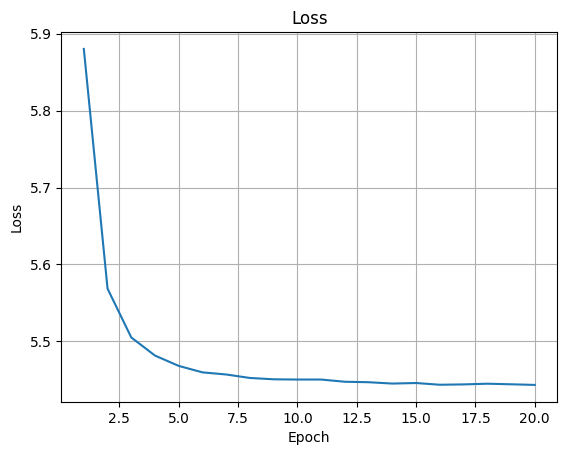

In [ ]:
import matplotlib.pyplot as plt

epoch = range(1, epochs + 1)

plt.plot(epoch, loss_history)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

<p class="task" id="5"></p>

5\. Посчитайте частоту совместного использования слов (с использованием контекстных окон ширины 5). Выберите одно слово ("центральное слово") случайным образом. Найдите топ-10 слов, наиболее часто используемых вместе с ним. Для каждой такой пары найдите ранг совместно используемого слова (в порядке увеличения евликлидова расстояния между данным и центральным словом). Выясните, как скоррелированы ранги по расстоянию между эмбеддингами и по частоте совместного использования.

- [ ] Проверено на семинаре

In [178]:
from scipy.spatial.distance import euclidean
from scipy.stats import spearmanr
from collections import defaultdict

window_size=5
corpus = df['text'].to_list()
dataset = W2VDataset(df['text'].to_list(), window_size=5)
tokens = dataset.tokens
token_to_idx = dataset.inverse_index
idx_to_token = dataset.index

#  Матрица совместной встречаемости
cooc_matrix = defaultdict(lambda: defaultdict(int))
for sent in corpus:
    filtered_sent = [word for word in sent if word in token_to_idx]
    for i in range(len(filtered_sent)):
        center = filtered_sent[i]
        center_idx = token_to_idx[center]
        for j in range(max(0, i - window_size), min(len(filtered_sent), i + window_size + 1)):
            if i == j:
                continue
            context = filtered_sent[j]
            context_idx = token_to_idx[context]
            cooc_matrix[center_idx][context_idx] += 1


central_idx = random.choice(list(cooc_matrix.keys()))
central_word = idx_to_token[central_idx]


context_counts = cooc_matrix[central_idx]
top10_contexts = sorted(context_counts.items(), key=lambda x: -x[1])[:10]
top10_indices = [idx for idx, _ in top10_contexts]


embeddings = model.embeddings.weight.data

# Евклидово расстояние
central_vec = embeddings[central_idx]
distances = []
for idx in top10_indices:
    vec = embeddings[idx]
    dist = euclidean(central_vec.numpy(), vec.numpy())
    distances.append((idx, dist))

# Ранги
freq_ranked = [idx for idx, _ in top10_contexts]
dist_ranked = [idx for idx, _ in sorted(distances, key=lambda x: x[1])]
freq_ranks = [freq_ranked.index(idx) + 1 for idx in top10_indices]
dist_ranks = [dist_ranked.index(idx) + 1 for idx in top10_indices]


correlation, p_val = spearmanr(freq_ranks, dist_ranks)


{
    "central_word": central_word,
    "top10_context_words": [idx_to_token[idx] for idx in top10_indices],
    "frequency_ranks": freq_ranks,
    "embedding_distance_ranks": dist_ranks,
    "spearman_correlation": (round(correlation, 4), p_val)
}

{'central_word': 'комиссии',
 'top10_context_words': ['рбк',
  'собрания',
  'сообщил',
  'решение',
  'россии',
  'губернатора',
  'вопрос',
  'решения',
  'рф',
  'области'],
 'frequency_ranks': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'embedding_distance_ranks': [1, 4, 3, 2, 6, 8, 7, 5, 9, 10],
 'spearman_correlation': (0.8667, 0.0011735381801554687)}

In [179]:
top10_contexts

[(372, 11),
 (431, 8),
 (438, 7),
 (378, 6),
 (381, 5),
 (90, 5),
 (53, 4),
 (379, 4),
 (398, 4),
 (271, 4)]